# Monte Carlo simulation MAMR1C 3T Rayleigh -Const Current MAMR1a

<img src="MAMR1C 3T.PNG" ALIGN="left" width="600" height="700"> 

In [11]:
__author__ ='Sung Chung'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import rayleigh
import datetime

pd.set_option('display.max_column',500)

In [12]:
#Find Rayleigh parameters from mean and sigma
def findRayleighLocScale(targetMean, targetSigma):
    mini=0.00001
    maxi=20.0
    mid_s=10.0
#find scale parameter    
    while np.abs(rayleigh.std(1,mid_s)-targetSigma)>0.001*targetSigma:       #less than 1% from target
        if (rayleigh.std(1,mid_s)-targetSigma)>0:
            maxi=mid_s
            mid_s=(mini+maxi)/2
        else:
            mini=mid_s
            mid_s=(mini+maxi)/2       
   
    mini=1
    maxi=100
    mid_l=50.0   
#find loc parameter        
    while np.abs(rayleigh.mean(mid_l,mid_s)-targetMean)>0.001*targetMean:                #less than 1% from target
        if rayleigh.mean(mid_l,mid_s)-targetMean>0:
            maxi=mid_l
            mid_l=(mini+maxi)/2
        else:
            mini=mid_l
            mid_l=(mini+maxi)/2           
    
    return mid_l,mid_s

def getSTOR(TG_R,SG_R,RL):
    TG_SG_resistance =  (TG_R)*(SG_R)/(TG_R+SG_R)
    STOR= (RL+TG_SG_resistance)
    return (TG_SG_resistance, STOR)

In [13]:

# #  TR:8.5%,  RS:7% sigma
# case='1Xsigma'
# RT, RT_sigma = 11.37,0.97  
# RT0, RT0_sigma = 1.2, 0.03 
# RLT, RLT_sigma = 0.78, 0.02   
# RS, RS_sigma = 2.5, 0.175 
# RS0, RS0_sigma =1, 0.025  
# RLS, RLS_sigma = 0.67, 0.017 
# RL0,RL0_sigma=0.5,0.013
# RM0,RM0_sigma=3.08,0.08  

# #  TR:17,  RS:14% sigma
# case='2Xsigma 17percent 14percent'
# RT, RT_sigma = 11.37,1.93  
# RT0, RT0_sigma = 1.2, 0.03 
# RLT, RLT_sigma = 0.78, 0.02   
# RS, RS_sigma = 2.5, 0.35 
# RS0, RS0_sigma =1, 0.025  
# RLS, RLS_sigma = 0.67, 0.017 
# RL0,RL0_sigma=0.5,0.013
# RM0,RM0_sigma=3.08,0.08  

# #  TR:17,  RS:14% sigma - play
# case='play'
# RT, RT_sigma = 11.37,1.93  
# RT0, RT0_sigma = 1.2, 0.5   ### play 
# RLT, RLT_sigma = 0.78, 0.02   
# RS, RS_sigma = 2.5, 0.35 
# RS0, RS0_sigma =1, 0.1      ### play  
# RLS, RLS_sigma = 0.67, 0.017 
# RL0,RL0_sigma=0.5,0.013
# RM0,RM0_sigma=3.08,0.08  



#########################################################################  #  RN TR:19%,  RS:16% sigma
# RN TR:19%,  RS:16% sigma, lead 3%
case='3T _19pct RL0 RM0 3%'
RT, RT_sigma = 11.37,2.16  
RT0, RT0_sigma = 1.2, 0.036 
RLT, RLT_sigma = 0.78, 0.0234   
RS, RS_sigma = 2.5, 0.4 
RS0, RS0_sigma =1, 0.03  
RLS, RLS_sigma = 0.67, 0.02 
RL0,RL0_sigma=0.5,0.015
RM0,RM0_sigma=3.08,0.0924  


case='3T _19pct RL0 RM0 6%'
RT, RT_sigma = 11.37,2.16  
RT0, RT0_sigma = 1.2, 0.036 
RLT, RLT_sigma = 0.78, 0.0234   
RS, RS_sigma = 2.5, 0.4 
RS0, RS0_sigma =1, 0.03  
RLS, RLS_sigma = 0.67, 0.02 
RL0,RL0_sigma=0.5,0.03
RM0,RM0_sigma=3.08,0.185  


In [14]:
#### LT parameters  :   TTF=A exp(Ea/kT)  from DOE6G1
A=1.29642E-13
Ea=1.3
k=8.61739E-05  

### input 
iTG=3.5
targetTemp=41


T0=74
PCM_FACTOR =1.0
num_samples=10000

RT_dTdW=108*PCM_FACTOR                             #RTG dT / dW slope   
RS_dTdW=62*PCM_FACTOR                             #RSG dT / dW slope 



#target mean and sigma -> return loc and scale
RT_L,RT_S=findRayleighLocScale(RT,RT_sigma)
RS_L,RS_S=findRayleighLocScale(RS,RS_sigma)


fname="3T_1a_3.5mA_" + "_" + case 

#normal distribution b 
RT_n=rayleigh.rvs(RT_L,RT_S,num_samples)
RT0_n=np.random.normal(RT0,RT0_sigma,num_samples)
RLT_n=np.random.normal(RLT,RLT_sigma,num_samples)
RS_n=rayleigh.rvs(RS_L,RS_S,num_samples)
RS0_n=np.random.normal(RS0,RS0_sigma,num_samples)
RLS_n=np.random.normal(RLS,RLS_sigma,num_samples)
RL0_n=np.random.normal(RL0,RL0_sigma,num_samples)
RM0_n=np.random.normal(RM0,RM0_sigma,num_samples)


df=pd.DataFrame({'RT':RT_n,'RT0':RT0_n,'RLT':RLT_n,'RS':RS_n,'RS0':RS0_n, 'RLS':RLS_n,'RL0':RL0_n,'RM0':RM0_n})

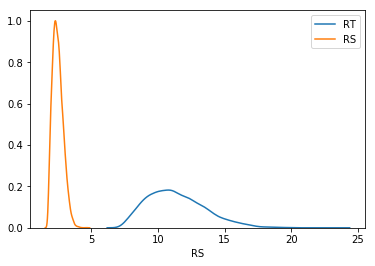

In [15]:
sns.distplot(df['RT'],hist=False,label="RT");
# sns.distplot(df['RL0'],hist=False,label="RL0");
sns.distplot(df['RS'],hist=False,label="RS");


<img src="DOE6G_2T.PNG" ALIGN="left" width="400" height="500"> 

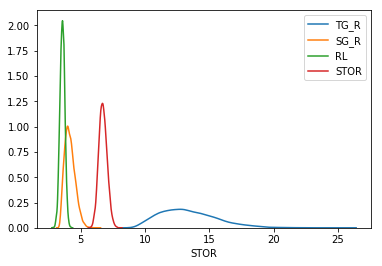

In [16]:
df['RTL']=df['RT0']+df['RLT']
df['RSL']=df['RS0']+df['RLS']

df['TG_R']=df['RT']+df['RTL']
df['SG_R']=df['RS']+df['RSL']
df['RL']=df['RL0']+df['RM0']
ans=np.vectorize(getSTOR)

df['TG_SG_R']=ans(df.TG_R,df.SG_R,df.RL)[0]
df['STOR']=ans(df.TG_R,df.SG_R,df.RL)[1]

sns.distplot(df['TG_R'],hist=False,label="TG_R");
sns.distplot(df['SG_R'],hist=False,label="SG_R");
# sns.distplot(df['TG_SG_R'],hist=False,label="TG_SG_R");
sns.distplot(df['RL'],hist=False,label="RL");
sns.distplot(df['STOR'],hist=False,label="STOR",);

# df.describe().round(2)

<img src="simpleSTOR.PNG" width=500> 

In [17]:
# # Constant PW mode on TG_R & SG_R
nominal_RTL=1.98                     #1.98 ohm :RTL= RLT+RL0 (nominal)  
nominal_RSL=1.67                       #1.67 ohm :RSL= RLS+RS0 (nominal)
#for column order
df['iTG']=0
df['iSG']=0
df['bias_current']=0


df['iTG']=iTG
df['TG_estimated_pw']=(df['iTG']**2)*(df['TG_R']-nominal_RTL)/1000     #estimated TG power
df['TG_estimatedTemp']=df['TG_estimated_pw']*RT_dTdW                   #estimated TG temp 
df['SG_estimatedTemp']=targetTemp-df['TG_estimatedTemp']               #desired SG temp              
df['SG_estimated_pw']=df['SG_estimatedTemp']/RS_dTdW                   #estimated SG temp 
df['iSG']=np.sqrt(df['SG_estimated_pw']/1000/(df['SG_R']-nominal_RSL))*1000


df['biasPW_TG_R']=(df['iTG']**2)*df['TG_R']/1000
df['biasPW_SG_R']=(df['iSG']**2)*df['SG_R']/1000

df['pwRTG']=(df['iTG']**2)*df['RT']/1000
df['pwRSG']=(df['iSG']**2)*df['RS']/1000

# df['iSG']=np.sqrt(BIASPW_SG_R/df['SG_R']/1000)*1000

df['bias_current']=df['iTG'] + df['iSG'] 

df['TG_iRatio']=df['iTG']/df['bias_current']
df['SG_iRatio']=1-df['TG_iRatio']

df['pwRTG']=(df['iTG']**2)*df['RT']/1000
df['pwRSG']=(df['iSG']**2)*df['RS']/1000

df['biasPW_TG_R']=(df['iTG']**2)*df['TG_R']/1000
df['biasPW_SG_R']=(df['iSG']**2)*df['SG_R']/1000


df['dT_RTG']=RT_dTdW*df['pwRTG']
df['dT_RSG']=RS_dTdW*df['pwRSG']
df['dTemp']=df['dT_RTG']+df['dT_RSG']
df['Temp']=df['dTemp']+T0

df['LifeTime']=A*np.exp(Ea/k/(df['Temp']+273))
df['LifeTime'].describe()

now=datetime.datetime.now()
month=now.month
day=now.day
second=now.second
df.to_csv(fname + "-{}-{}_{}sec.csv".format(month, day, second))
df.describe()

,RT,RT0,RLT,RS,RS0,RLS,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR,iTG,iSG,bias_current,TG_estimated_pw,TG_estimatedTemp,SG_estimatedTemp,SG_estimated_pw,biasPW_TG_R,biasPW_SG_R,pwRTG,pwRSG,TG_iRatio,SG_iRatio,dT_RTG,dT_RSG,dTemp,Temp,LifeTime
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.365889,1.199422,0.779938,2.491492,0.999786,0.670144,0.499659,3.079502,1.979360,1.669930,13.345249,4.161421,3.579161,3.152605,6.731766,3.5,13.064998,16.564998,0.139224,15.036225,25.963775,0.418771,0.163479,0.706467,0.139232,0.418895,0.212529,0.787471,15.037072,25.971476,41.008548,115.008548,9964.963325
std,2.151348,0.036121,0.023427,0.396608,0.029843,0.020103,0.029793,0.186508,0.043094,0.035980,2.151433,0.398855,0.188716,0.256907,0.317586,0.0,1.256659,1.256659,0.026355,2.846346,2.846346,0.045909,0.026355,0.089536,0.026354,0.046326,0.016439,0.016439,2.846233,2.872185,0.395778,0.395778,394.347257
min,7.271455,1.046715,0.692851,1.749871,0.899607,0.591882,0.388528,2.328905,1.784502,1.532010,9.246334,3.331428,2.852420,2.526587,5.755022,3.5,7.105443,10.605443,0.089013,9.613360,10.118931,0.163209,0.113268,0.247522,0.089075,0.162380,0.171424,0.669981,9.620135,10.067567,39.451156,113.451156,8076.751603
25%,9.734063,1.174961,0.764258,2.192998,0.979527,0.656838,0.479274,2.951664,1.950516,1.645885,11.709689,3.861962,3.450628,2.963001,6.509927,3.5,12.189958,15.689958,0.119189,12.872378,24.156246,0.389617,0.143444,0.647531,0.119242,0.389178,0.200617,0.776927,12.878165,24.129015,40.749740,114.749740,9710.626602
50%,11.109402,1.199333,0.779894,2.444125,0.999779,0.670438,0.499771,3.082144,1.979621,1.670132,13.083047,4.115364,3.581425,3.128635,6.719725,3.5,13.054479,16.554479,0.136012,14.689332,26.310668,0.424366,0.160267,0.710679,0.136090,0.424377,0.211423,0.788577,14.697738,26.311399,40.998768,114.998768,9966.504990
75%,12.729331,1.223116,0.795926,2.738822,1.019526,0.683697,0.519940,3.206089,2.008408,1.694300,14.711484,4.411472,3.707907,3.317630,6.941248,3.5,13.946194,17.446194,0.155961,16.843754,28.127622,0.453671,0.180216,0.769160,0.155934,0.453666,0.223073,0.799383,16.840905,28.127287,41.258491,115.258491,10218.511447
max,23.286582,1.335527,0.873326,4.677221,1.124708,0.740420,0.623820,3.797045,2.129733,1.815115,25.321700,6.347225,4.284975,4.411117,8.053416,3.5,16.917188,20.417188,0.285936,30.881069,31.386640,0.506236,0.310191,0.969102,0.285261,0.529700,0.330019,0.828576,30.808148,32.841410,43.108191,117.108191,11645.685940


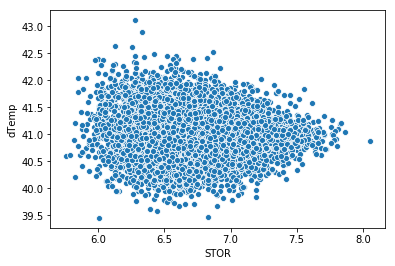

In [18]:
sns.scatterplot(x=df.STOR,y=df.dTemp)

,STOR,dT_RTG,dT_RSG,dTemp
count,10000.00,10000.00,10000.00,10000.00
mean,6.73,15.04,25.97,41.01
std,0.32,2.85,2.87,0.40
min,5.76,9.62,10.07,39.45
25%,6.51,12.88,24.13,40.75
50%,6.72,14.70,26.31,41.00
75%,6.94,16.84,28.13,41.26
max,8.05,30.81,32.84,43.11


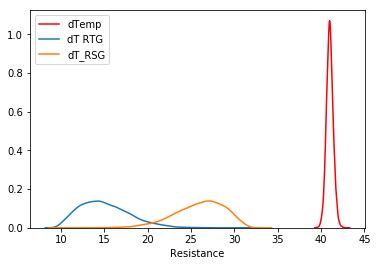

In [19]:
sns.distplot(df['dTemp'],hist=False,label='dTemp',color='r');
sns.distplot(df['dT_RTG'],hist=False,label="dT RTG");
sns.distplot(df['dT_RSG'],hist=False,label="dT_RSG");
plt.xlabel("Resistance")


df.describe().to_csv('RTG 20%, RSG: 10%, all lead 5%')
df[['STOR','dT_RTG','dT_RSG','dTemp']].describe().round(2)

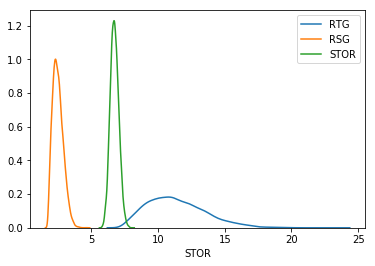

In [20]:


sns.distplot(df['RT'],hist=False,label="RTG");
sns.distplot(df['RS'],hist=False,label="RSG");
sns.distplot(df['STOR'],hist=False,label="STOR",);
# plt.xlim(left=4.7, right=6.5)
